In [2]:
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold

from utils import *
from descriptor import *
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from catboost import CatBoostRegressor

base_path = os.getcwd()
warnings.filterwarnings('ignore')

filename = "../features/soap_topology_total.csv"
data = pd.read_csv(filename,index_col=0)
train = pd.read_csv("../features/Moghdamtrain.csv")
test = pd.read_csv("../features/Mohadamtest.csv")

In [7]:
soap_columns = list(data.columns)[198:]
tobacco = pd.read_csv("../features/total_tobacco.csv")
tobacco_cif = tobacco["cif_file"]
tobacco = data[data["cif_file"].isin(tobacco_cif)]
columns = geometric + RAC + soap_columns + property_
new_columns = geometric + RAC + soap_columns
descriptors = tobacco[new_columns]
drop_col = remove_constant_value_features(descriptors)
new_df_columns = [e for e in descriptors.columns if e not in drop_col]
property_ = ["KVRH"]

In [9]:
X_train = train[new_columns]
X_test = test[new_columns]
y_train = train[property_]
y_test = test[property_]

In [10]:
model = CatBoostRegressor(random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(r2_score(y_test,y_pred))

Learning rate set to 0.047917
0:	learn: 6.5139360	total: 278ms	remaining: 4m 37s
1:	learn: 6.3267449	total: 448ms	remaining: 3m 43s
2:	learn: 6.1510272	total: 650ms	remaining: 3m 36s
3:	learn: 5.9847762	total: 846ms	remaining: 3m 30s
4:	learn: 5.8360943	total: 1.02s	remaining: 3m 23s
5:	learn: 5.6831920	total: 1.19s	remaining: 3m 17s
6:	learn: 5.5449166	total: 1.38s	remaining: 3m 16s
7:	learn: 5.3967747	total: 1.53s	remaining: 3m 9s
8:	learn: 5.2695346	total: 1.69s	remaining: 3m 5s
9:	learn: 5.1559351	total: 1.85s	remaining: 3m 2s
10:	learn: 5.0346249	total: 2.05s	remaining: 3m 4s
11:	learn: 4.9223027	total: 2.21s	remaining: 3m 2s
12:	learn: 4.8148408	total: 2.41s	remaining: 3m 3s
13:	learn: 4.7032045	total: 2.58s	remaining: 3m 1s
14:	learn: 4.5927276	total: 2.75s	remaining: 3m
15:	learn: 4.4916961	total: 2.91s	remaining: 2m 58s
16:	learn: 4.3996945	total: 3.06s	remaining: 2m 56s
17:	learn: 4.3090099	total: 3.21s	remaining: 2m 55s
18:	learn: 4.2275245	total: 3.37s	remaining: 2m 54s
19:

157:	learn: 1.6215768	total: 28s	remaining: 2m 29s
158:	learn: 1.6150878	total: 28.1s	remaining: 2m 28s
159:	learn: 1.6091925	total: 28.3s	remaining: 2m 28s
160:	learn: 1.6044875	total: 28.5s	remaining: 2m 28s
161:	learn: 1.5984046	total: 28.7s	remaining: 2m 28s
162:	learn: 1.5942648	total: 28.9s	remaining: 2m 28s
163:	learn: 1.5898504	total: 29s	remaining: 2m 27s
164:	learn: 1.5841754	total: 29.2s	remaining: 2m 27s
165:	learn: 1.5828804	total: 29.4s	remaining: 2m 27s
166:	learn: 1.5790147	total: 29.6s	remaining: 2m 27s
167:	learn: 1.5727637	total: 29.7s	remaining: 2m 27s
168:	learn: 1.5685226	total: 29.9s	remaining: 2m 27s
169:	learn: 1.5662873	total: 30.1s	remaining: 2m 27s
170:	learn: 1.5617108	total: 30.3s	remaining: 2m 26s
171:	learn: 1.5604884	total: 30.4s	remaining: 2m 26s
172:	learn: 1.5536053	total: 30.6s	remaining: 2m 26s
173:	learn: 1.5488407	total: 30.8s	remaining: 2m 26s
174:	learn: 1.5442055	total: 30.9s	remaining: 2m 25s
175:	learn: 1.5374614	total: 31.1s	remaining: 2m 2

313:	learn: 1.0374839	total: 56.8s	remaining: 2m 4s
314:	learn: 1.0345647	total: 57s	remaining: 2m 3s
315:	learn: 1.0336063	total: 57.2s	remaining: 2m 3s
316:	learn: 1.0311673	total: 57.4s	remaining: 2m 3s
317:	learn: 1.0278007	total: 57.6s	remaining: 2m 3s
318:	learn: 1.0252264	total: 57.8s	remaining: 2m 3s
319:	learn: 1.0227263	total: 58s	remaining: 2m 3s
320:	learn: 1.0200249	total: 58.3s	remaining: 2m 3s
321:	learn: 1.0165079	total: 58.5s	remaining: 2m 3s
322:	learn: 1.0147863	total: 58.7s	remaining: 2m 3s
323:	learn: 1.0118518	total: 58.9s	remaining: 2m 2s
324:	learn: 1.0098063	total: 59s	remaining: 2m 2s
325:	learn: 1.0084523	total: 59.2s	remaining: 2m 2s
326:	learn: 1.0056199	total: 59.4s	remaining: 2m 2s
327:	learn: 1.0024172	total: 59.5s	remaining: 2m 1s
328:	learn: 1.0008938	total: 59.7s	remaining: 2m 1s
329:	learn: 0.9980878	total: 59.9s	remaining: 2m 1s
330:	learn: 0.9954306	total: 1m	remaining: 2m 1s
331:	learn: 0.9930356	total: 1m	remaining: 2m 1s
332:	learn: 0.9910875	to

468:	learn: 0.7497053	total: 1m 25s	remaining: 1m 36s
469:	learn: 0.7488224	total: 1m 25s	remaining: 1m 36s
470:	learn: 0.7468117	total: 1m 25s	remaining: 1m 36s
471:	learn: 0.7453794	total: 1m 26s	remaining: 1m 36s
472:	learn: 0.7433471	total: 1m 26s	remaining: 1m 36s
473:	learn: 0.7414651	total: 1m 26s	remaining: 1m 35s
474:	learn: 0.7404437	total: 1m 26s	remaining: 1m 35s
475:	learn: 0.7387876	total: 1m 26s	remaining: 1m 35s
476:	learn: 0.7379824	total: 1m 26s	remaining: 1m 35s
477:	learn: 0.7369381	total: 1m 27s	remaining: 1m 35s
478:	learn: 0.7352966	total: 1m 27s	remaining: 1m 34s
479:	learn: 0.7338581	total: 1m 27s	remaining: 1m 34s
480:	learn: 0.7334102	total: 1m 27s	remaining: 1m 34s
481:	learn: 0.7316503	total: 1m 27s	remaining: 1m 34s
482:	learn: 0.7301202	total: 1m 28s	remaining: 1m 34s
483:	learn: 0.7290289	total: 1m 28s	remaining: 1m 34s
484:	learn: 0.7276608	total: 1m 28s	remaining: 1m 33s
485:	learn: 0.7258195	total: 1m 28s	remaining: 1m 33s
486:	learn: 0.7245874	total:

621:	learn: 0.5757108	total: 1m 52s	remaining: 1m 8s
622:	learn: 0.5754373	total: 1m 52s	remaining: 1m 8s
623:	learn: 0.5743162	total: 1m 52s	remaining: 1m 7s
624:	learn: 0.5730380	total: 1m 52s	remaining: 1m 7s
625:	learn: 0.5720339	total: 1m 53s	remaining: 1m 7s
626:	learn: 0.5717815	total: 1m 53s	remaining: 1m 7s
627:	learn: 0.5711536	total: 1m 53s	remaining: 1m 7s
628:	learn: 0.5701304	total: 1m 53s	remaining: 1m 7s
629:	learn: 0.5690478	total: 1m 54s	remaining: 1m 6s
630:	learn: 0.5680331	total: 1m 54s	remaining: 1m 6s
631:	learn: 0.5668789	total: 1m 54s	remaining: 1m 6s
632:	learn: 0.5657495	total: 1m 54s	remaining: 1m 6s
633:	learn: 0.5649795	total: 1m 54s	remaining: 1m 6s
634:	learn: 0.5646766	total: 1m 55s	remaining: 1m 6s
635:	learn: 0.5637859	total: 1m 55s	remaining: 1m 6s
636:	learn: 0.5630787	total: 1m 55s	remaining: 1m 5s
637:	learn: 0.5622538	total: 1m 55s	remaining: 1m 5s
638:	learn: 0.5613581	total: 1m 56s	remaining: 1m 5s
639:	learn: 0.5604438	total: 1m 56s	remaining:

779:	learn: 0.4493432	total: 2m 21s	remaining: 39.8s
780:	learn: 0.4485566	total: 2m 21s	remaining: 39.6s
781:	learn: 0.4480160	total: 2m 21s	remaining: 39.4s
782:	learn: 0.4471432	total: 2m 21s	remaining: 39.3s
783:	learn: 0.4463892	total: 2m 21s	remaining: 39.1s
784:	learn: 0.4451233	total: 2m 21s	remaining: 38.9s
785:	learn: 0.4447226	total: 2m 22s	remaining: 38.7s
786:	learn: 0.4442388	total: 2m 22s	remaining: 38.5s
787:	learn: 0.4435612	total: 2m 22s	remaining: 38.3s
788:	learn: 0.4428570	total: 2m 22s	remaining: 38.2s
789:	learn: 0.4425207	total: 2m 22s	remaining: 38s
790:	learn: 0.4418534	total: 2m 23s	remaining: 37.8s
791:	learn: 0.4408663	total: 2m 23s	remaining: 37.6s
792:	learn: 0.4399761	total: 2m 23s	remaining: 37.5s
793:	learn: 0.4394743	total: 2m 23s	remaining: 37.3s
794:	learn: 0.4387650	total: 2m 23s	remaining: 37.1s
795:	learn: 0.4382047	total: 2m 23s	remaining: 36.9s
796:	learn: 0.4376642	total: 2m 24s	remaining: 36.7s
797:	learn: 0.4368457	total: 2m 24s	remaining: 3

936:	learn: 0.3606124	total: 2m 50s	remaining: 11.4s
937:	learn: 0.3599251	total: 2m 50s	remaining: 11.3s
938:	learn: 0.3594699	total: 2m 50s	remaining: 11.1s
939:	learn: 0.3588048	total: 2m 50s	remaining: 10.9s
940:	learn: 0.3587340	total: 2m 50s	remaining: 10.7s
941:	learn: 0.3584278	total: 2m 50s	remaining: 10.5s
942:	learn: 0.3583528	total: 2m 51s	remaining: 10.3s
943:	learn: 0.3579971	total: 2m 51s	remaining: 10.2s
944:	learn: 0.3575765	total: 2m 51s	remaining: 9.99s
945:	learn: 0.3568381	total: 2m 51s	remaining: 9.8s
946:	learn: 0.3564631	total: 2m 51s	remaining: 9.62s
947:	learn: 0.3562967	total: 2m 52s	remaining: 9.44s
948:	learn: 0.3557691	total: 2m 52s	remaining: 9.26s
949:	learn: 0.3553915	total: 2m 52s	remaining: 9.07s
950:	learn: 0.3551606	total: 2m 52s	remaining: 8.89s
951:	learn: 0.3545271	total: 2m 52s	remaining: 8.71s
952:	learn: 0.3539887	total: 2m 52s	remaining: 8.53s
953:	learn: 0.3532890	total: 2m 53s	remaining: 8.35s
954:	learn: 0.3530892	total: 2m 53s	remaining: 

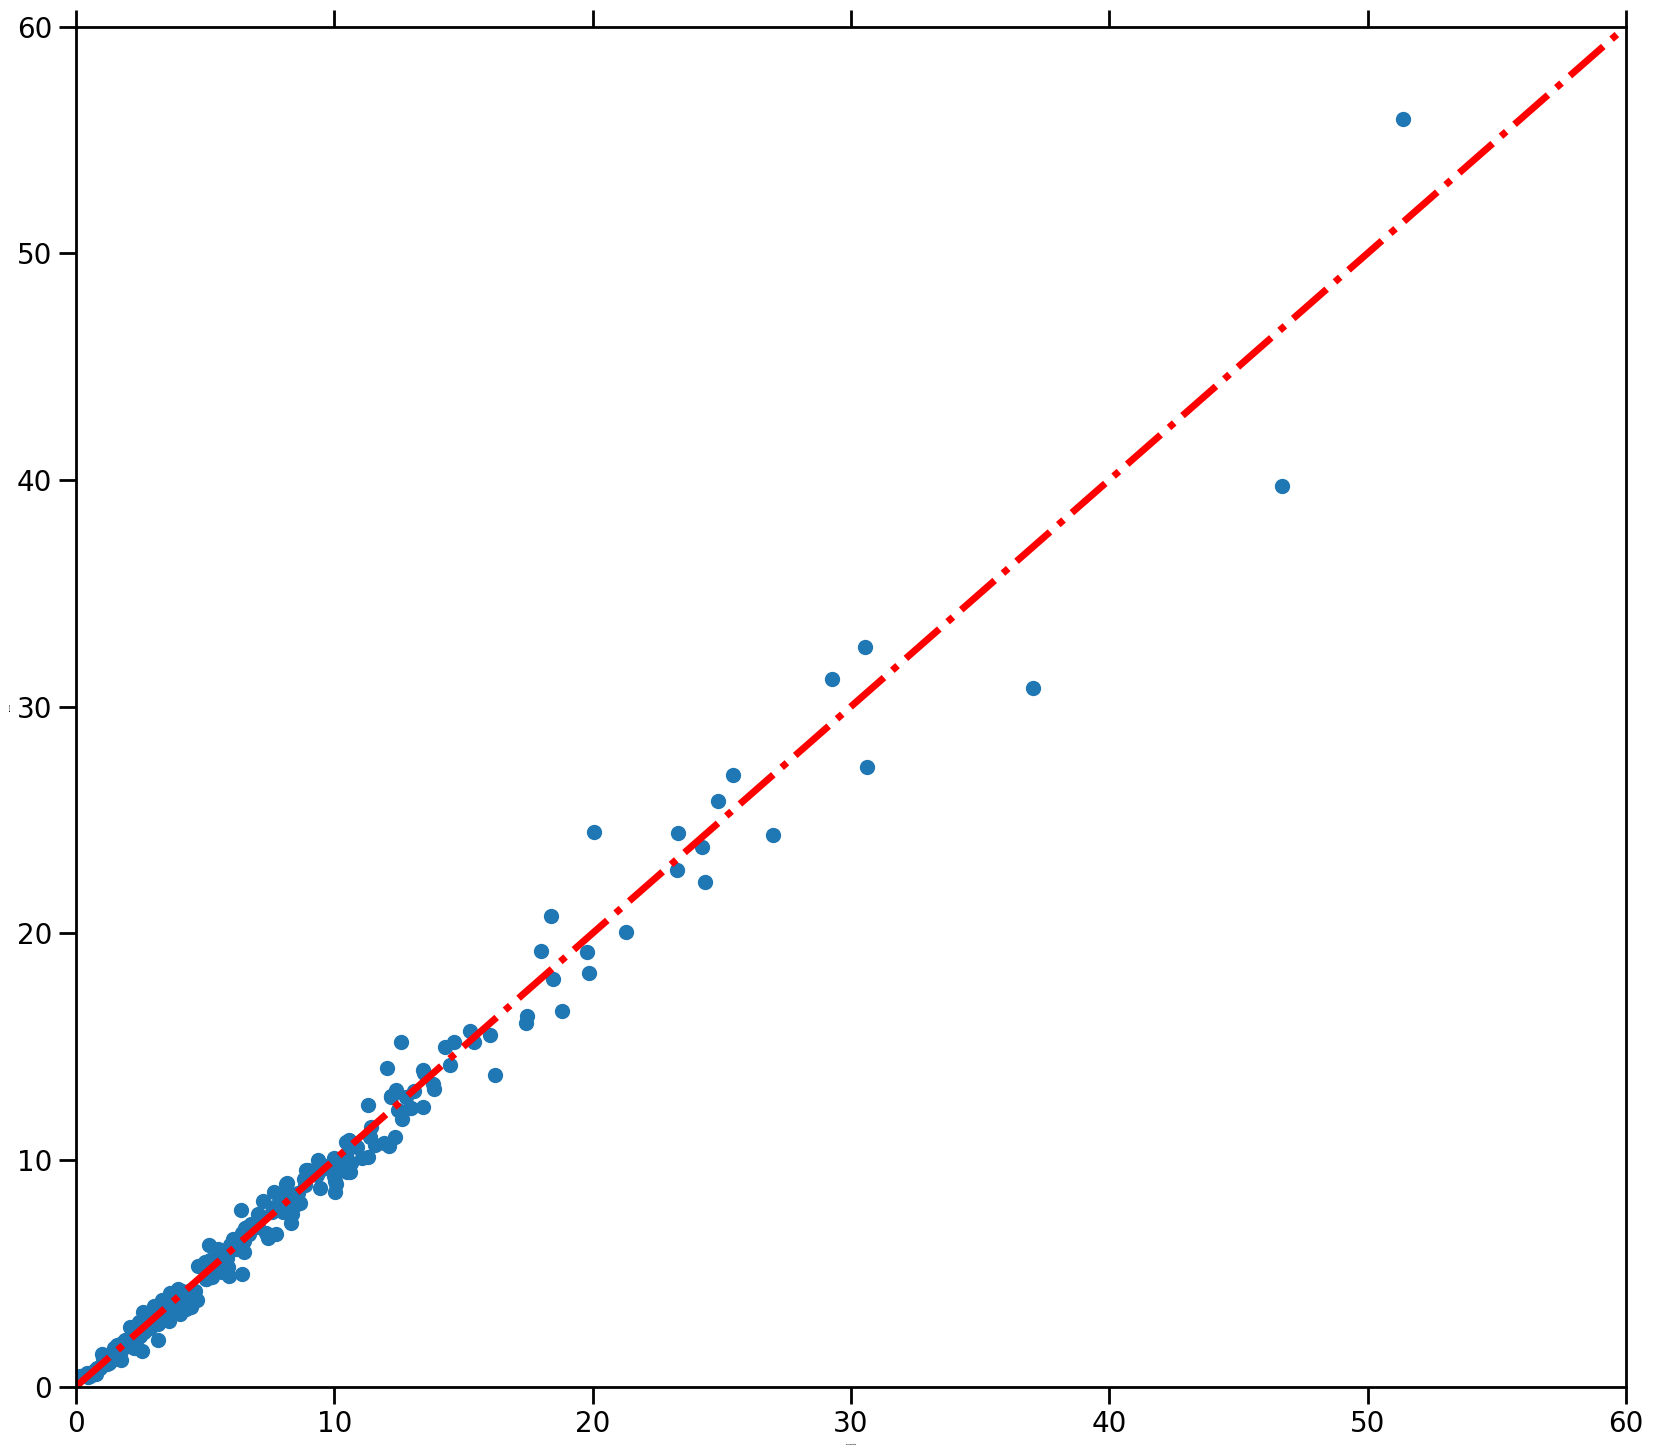

In [15]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
plt.rcParams.update({"font.size":20})
plt.rcParams.update({"font.size":20})


fig, ax = plt.subplots(figsize=(20,20))

plt.setp(ax.spines.values(), linewidth=2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)


plt.tick_params(axis='x', direction='out',length=12, pad=5, 
                labelsize=20, labelcolor='black', top=True)

plt.tick_params(axis='y', direction='out', length=12, pad=5, 
                labelsize=20, labelcolor='black', top=True)

x = np.linspace(0,100,num=10000)
y = x
plt.xlabel("Ground truth",size=0,fontweight='bold')
plt.ylabel("Prediction", size = 0, fontweight='bold')

ax.scatter(y_test,y_pred,s=100)
plt.plot(x,y,linewidth = 5, color = "red",linestyle="dashdot")
plt.gcf().subplots_adjust(bottom=0.20)

plt.grid(False)
plt.xlim([0,60])
plt.ylim([0,60])
plt.show()

In [13]:
y_test

,KVRH
0,19.871760
1,6.521656
2,9.827736
3,4.327737
4,0.534245
...,...
249,14.289540
250,8.661494
251,2.732383
252,3.830186
